# **Question (a) (i)**

      0     1  2
0 -0.91 -0.16 -1
1  0.76 -0.70 -1
2  0.52  0.76  1
3 -0.21  0.80  1
4  0.26 -0.98 -1


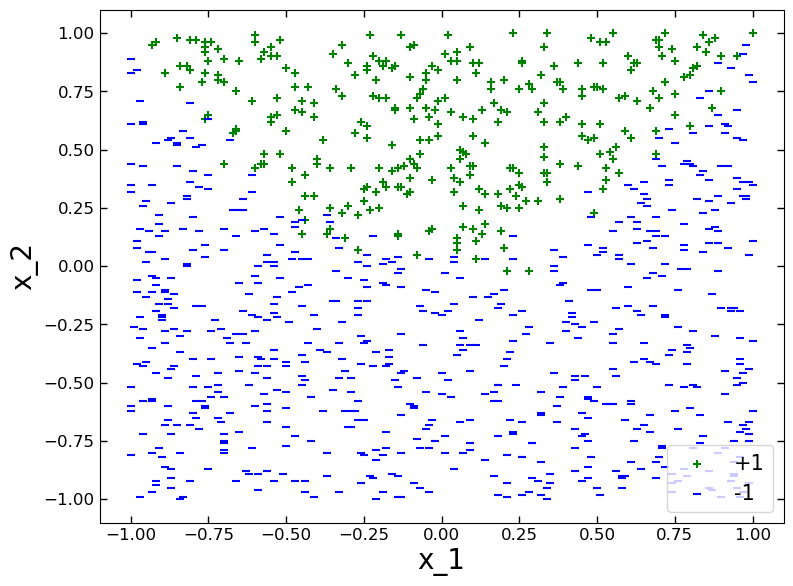

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Reading in data
df = pd.read_csv(r"week2.csv",header=None,skiprows=1)
print(df.head())
X1=df.iloc[:,0].to_numpy()
X2=df.iloc[:,1].to_numpy()
X=np.column_stack((X1,X2))
y=df.iloc[:,2]

# Initializing empty lists
X1_plus = []
X2_plus = []
X1_minus = []
X2_minus = []

# Sorting data in +1 or -1
for i in range(len(y)):
    if y.iloc[i] == 1: # if y = +1
        X1_plus.append(X1[i])
        X2_plus.append(X2[i])
        
    else:  # if y = -1
        X1_minus.append(X1[i])
        X2_minus.append(X2[i])

#Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X1_plus, X2_plus, marker='+', color='green', label='+1')
plt.scatter(X1_minus, X2_minus, marker='_', color='blue', label='-1')
plt.xlabel('x_1', fontsize=20)
plt.ylabel('x_2', fontsize=20)
plt.legend(loc='lower right', fontsize=15)
plt.tight_layout()
plt.tick_params(direction='in', which='both', top=True, right=True, length=5, width=1, labelsize=12)
plt.show()

# Convert lists back to numpy arrays
#X1_plus = np.array(X1_plus)
#X2_plus = np.array(X2_plus)
#X1_minus = np.array(X1_minus)
#X2_minus = np.array(X2_minus)

#Plotting
#plt.figure(figsize=(8, 6))
#plt.scatter(X1_plus**2, X2_plus, marker='+', color='green', label='+1')
#plt.scatter(X1_minus**2, X2_minus, marker='_', color='blue', label='-1')
#plt.xlabel('x_1', fontsize=20)
#plt.ylabel('x_2', fontsize=20)
#plt.legend(loc='lower right', fontsize=15)
#plt.tight_layout()
#plt.tick_params(direction='in', which='both', top=True, right=True, length=5, width=1, labelsize=12)
#plt.show()

# **Question (a) (ii)**

In [2]:
model = LogisticRegression(penalty='none', solver='lbfgs')
model.fit(X, y)  # Use your X (2D) and y directly
print("intercept %f, coefficients %f %f" % (model.intercept_[0], model.coef_[0][0], model.coef_[0][1]))

intercept -2.190742, coefficients -0.201916 5.948297


C:\Users\marcl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


# **Question (a) (iii)**

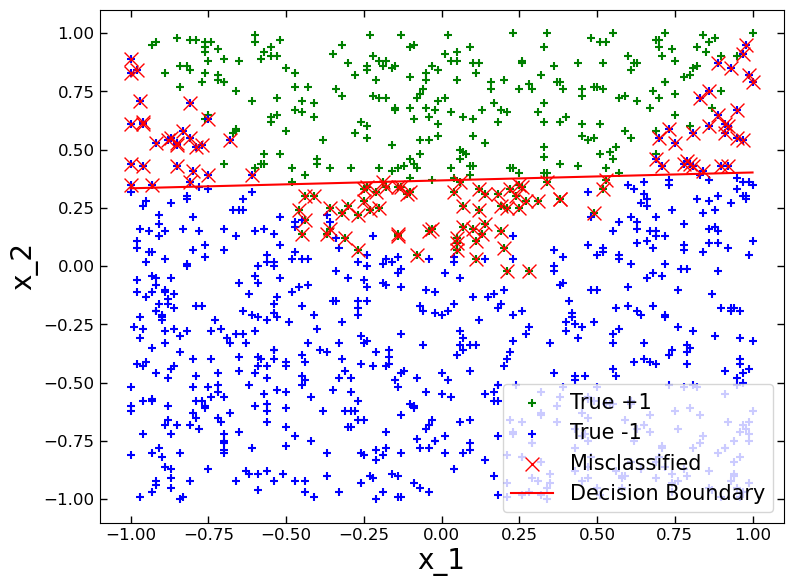

In [3]:
y_pred = model.predict(X)

# Plot predictions using loops
X1_pred_plus = []
X2_pred_plus = []
X1_pred_minus = []
X2_pred_minus = []

for i in range(len(y_pred)):
    if y_pred[i] == 1:
        X1_pred_plus.append(X1[i])
        X2_pred_plus.append(X2[i])
    else:
        X1_pred_minus.append(X1[i])
        X2_pred_minus.append(X2[i])

plt.figure(figsize=(8, 6))

plt.scatter(X1_plus, X2_plus, marker='+', color='green', s=30, label='True +1')
plt.scatter(X1_minus, X2_minus, marker='+', color='blue', s=30, label='True -1')

misclassified = (y != y_pred)
plt.scatter(X1[misclassified], X2[misclassified], marker='x', color='red', s=100, linewidth=1, label='Misclassified')

x1_line = np.linspace(X1.min(), X1.max())
x2_line = (2.190742 + 0.201916 * x1_line) / 5.948297

plt.plot(x1_line, x2_line, 'r-', label='Decision Boundary')
plt.xlabel('x_1', fontsize=20)
plt.ylabel('x_2', fontsize=20)
plt.legend(loc='lower right', fontsize=15)
plt.tight_layout()
plt.tick_params(direction='in', which='both', top=True, right=True, length=5, width=1, labelsize=12)
plt.show()

# **Question (b)**

C:\Users\marcl\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


C = 0.001
intercept: -0.247338
coefficients: 0.011037, 0.468438


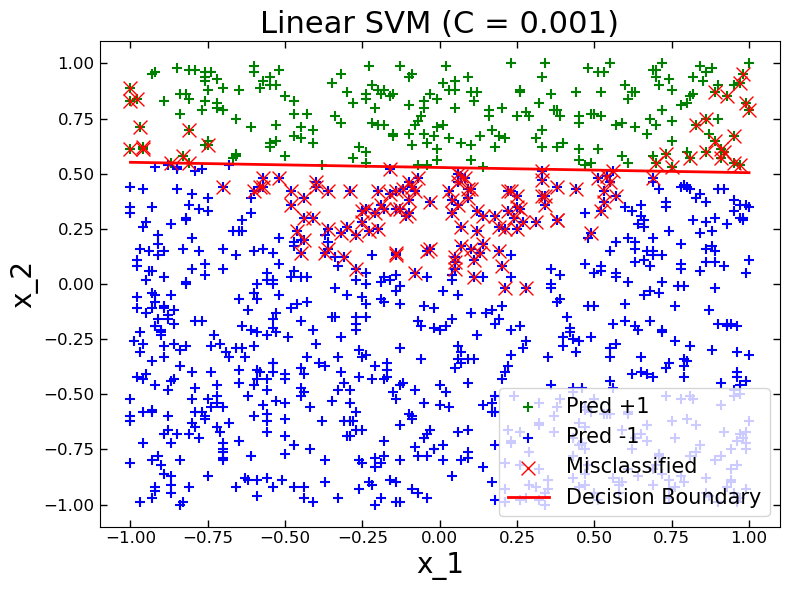

C:\Users\marcl\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


C = 1
intercept: -0.707605
coefficients: -0.065861, 1.924434


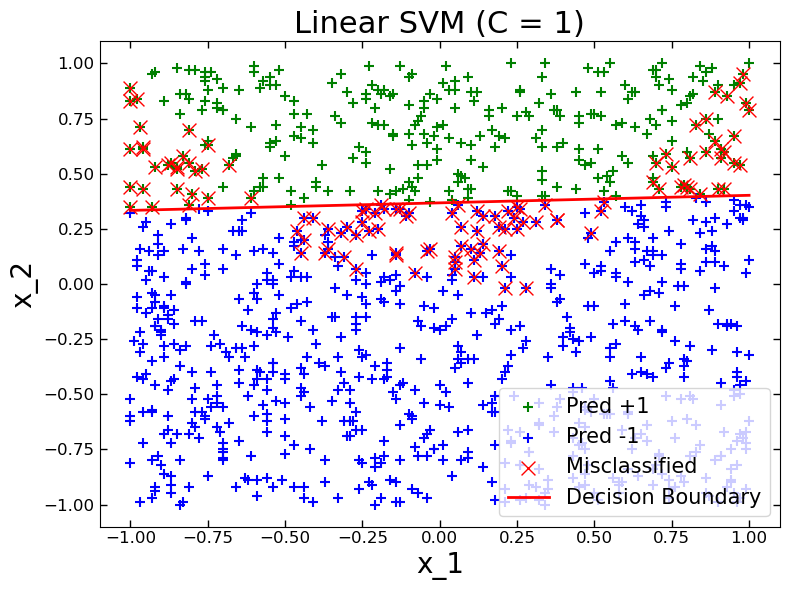

C:\Users\marcl\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


C = 100
intercept: -0.717148
coefficients: -0.068006, 1.948204


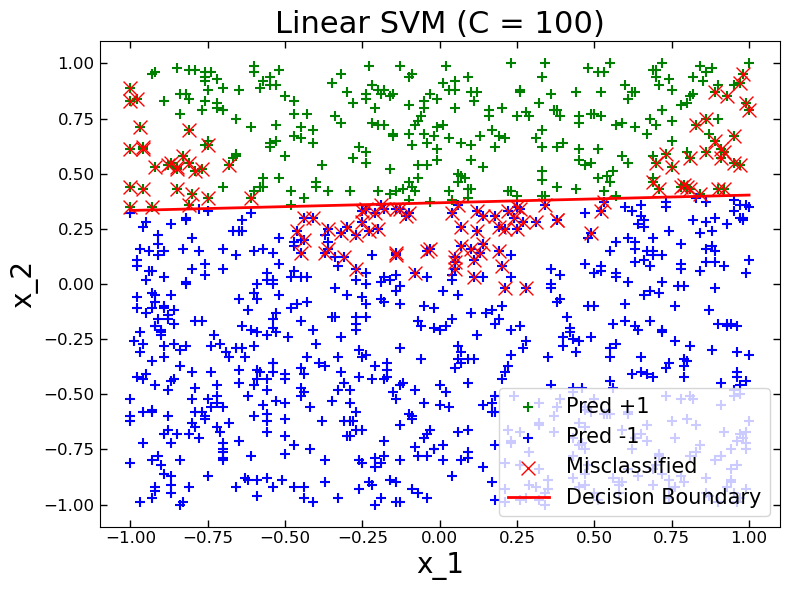

In [5]:
# C values to try
C_values = [0.001, 1, 100]

for C in C_values:
    # Train the SVM
    svm_model = LinearSVC(C=C, random_state=42, max_iter=10000, dual = 'auto')
    svm_model.fit(X, y)
    
    # Get predictions
    y_pred_svm = svm_model.predict(X)
    
    # Print parameters
    print(f"C = {C}")
    print(f"intercept: {svm_model.intercept_[0]:.6f}")
    print(f"coefficients: {svm_model.coef_[0][0]:.6f}, {svm_model.coef_[0][1]:.6f}")
    
    # Separate predictions using loops
    X1_pred_plus = []
    X2_pred_plus = []
    X1_pred_minus = []
    X2_pred_minus = []
    
    for i in range(len(y_pred_svm)):
        if y_pred_svm[i] == 1:
            X1_pred_plus.append(X1[i])
            X2_pred_plus.append(X2[i])
        else:
            X1_pred_minus.append(X1[i])
            X2_pred_minus.append(X2[i])
    
    # Create plot
    plt.figure(figsize=(8, 6))
    
    # Plot predictions
    plt.scatter(X1_pred_plus, X2_pred_plus, marker='+', color='green', s=60, label='Pred +1')
    plt.scatter(X1_pred_minus, X2_pred_minus, marker='+', color='blue', s=60, label='Pred -1')
    
    # Highlight misclassifications with red X
    misclassified = (y != y_pred_svm)
    plt.scatter(X1[misclassified], X2[misclassified], marker='x', color='red', s=100, linewidth=1, label='Misclassified')
    
    # Calculate and plot decision boundary
    intercept = svm_model.intercept_[0]
    coef1 = svm_model.coef_[0][0]
    coef2 = svm_model.coef_[0][1]
    
    x1_line = np.linspace(X1.min(), X1.max(), 100)
    x2_line = -(intercept + coef1 * x1_line) / coef2
    plt.plot(x1_line, x2_line, 'r-', linewidth=2, label='Decision Boundary')
    
    # Formatting
    plt.xlabel('x_1', fontsize=20)
    plt.ylabel('x_2', fontsize=20)
    plt.title(f'Linear SVM (C = {C})', fontsize=22)
    plt.legend(loc='lower right', fontsize=15)
    plt.tick_params(direction='in', which='both', top=True, right=True, length=5, width=1, labelsize=12)
    plt.tight_layout()
    plt.show()

# **Question (c)**

Polynomial Logistic Regression Parameters:
θ₀ (intercept): -0.793784
θ₁ (x₁): -0.009408
θ₂ (x₂): 23.583843
θ₃ (x₁²): -22.924715
θ₄ (x₂²): 0.004813


C:\Users\marcl\AppData\Local\Temp\ipykernel_11860\1421355173.py:60: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1_mesh, X2_mesh, Z, levels=[0], colors='red', linewidths=2, label='Decision Boundary')


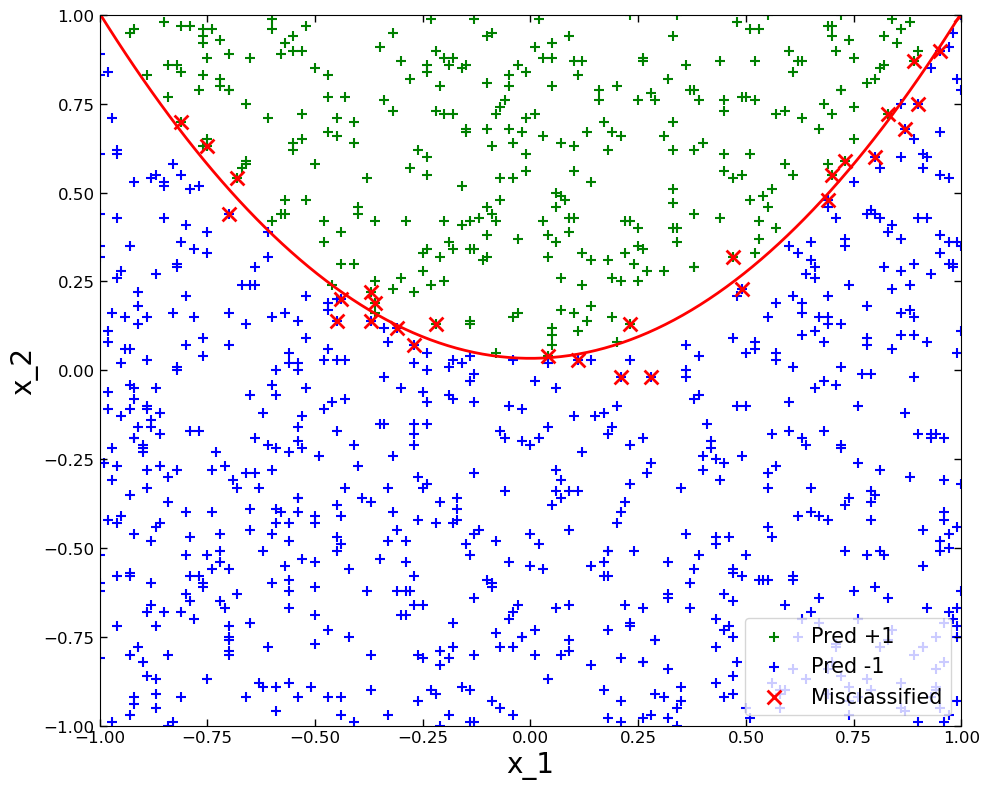


Polynomial Logistic Regression model for predictions:
sign(-0.793784 + -0.009408*x₁ + 23.583843*x₂ + -22.924715*x₁² + 0.004813*x₂²)

Accuracy: 97.1% (970/999 correct)


In [9]:
X1_squared = X1**2
X2_squared = X2**2
X_poly = np.column_stack((X1, X2, X1_squared, X2_squared))

# Train logistic regression
poly_model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
poly_model.fit(X_poly, y)

# Print parameters
print("Polynomial Logistic Regression Parameters:")
print(f"θ₀ (intercept): {poly_model.intercept_[0]:.6f}")
print(f"θ₁ (x₁): {poly_model.coef_[0][0]:.6f}")
print(f"θ₂ (x₂): {poly_model.coef_[0][1]:.6f}")
print(f"θ₃ (x₁²): {poly_model.coef_[0][2]:.6f}")
print(f"θ₄ (x₂²): {poly_model.coef_[0][3]:.6f}")

# Get predictions on training data
y_pred_poly = poly_model.predict(X_poly)

# Separate predictions using loops (plotting in original 2D space)
X1_pred_plus = []
X2_pred_plus = []
X1_pred_minus = []
X2_pred_minus = []

for i in range(len(y_pred_poly)):
    if y_pred_poly[i] == 1:
        X1_pred_plus.append(X1[i])
        X2_pred_plus.append(X2[i])
    else:
        X1_pred_minus.append(X1[i])
        X2_pred_minus.append(X2[i])

# Create the plot
plt.figure(figsize=(10, 8))

# Plot predictions (same style as before)
plt.scatter(X1_pred_plus, X2_pred_plus, marker='+', color='green', s=60, label='Pred +1')
plt.scatter(X1_pred_minus, X2_pred_minus, marker='+', color='blue', s=60, label='Pred -1')

# Highlight misclassifications
misclassified = (y != y_pred_poly)
plt.scatter(X1[misclassified], X2[misclassified], marker='x', color='red', s=100, linewidth=2, label='Misclassified')

# Create decision boundary curve
x1_grid = np.linspace(X1.min(), X1.max(), 100)
x2_grid = np.linspace(X2.min(), X2.max(), 100)
X1_mesh, X2_mesh = np.meshgrid(x1_grid, x2_grid)

# Create polynomial features for the grid
X1_flat = X1_mesh.ravel()
X2_flat = X2_mesh.ravel()
X_grid_poly = np.column_stack((X1_flat, X2_flat, X1_flat**2, X2_flat**2))

# Get decision function values (before taking sign)
Z = poly_model.decision_function(X_grid_poly)
Z = Z.reshape(X1_mesh.shape)

# Plot the curved decision boundary where Z = 0
plt.contour(X1_mesh, X2_mesh, Z, levels=[0], colors='red', linewidths=2, label='Decision Boundary')

# Formatting (same style as before)
plt.xlabel('x_1', fontsize=20)
plt.ylabel('x_2', fontsize=20)
plt.legend(loc='lower right', fontsize=15)
plt.tick_params(direction='in', which='both', top=True, right=True, length=5, width=1, labelsize=12)
plt.tight_layout()
plt.show()

# Print model for predictions
print(f"\nPolynomial Logistic Regression model for predictions:")
print(f"sign({poly_model.intercept_[0]:.6f} + {poly_model.coef_[0][0]:.6f}*x₁ + {poly_model.coef_[0][1]:.6f}*x₂ + {poly_model.coef_[0][2]:.6f}*x₁² + {poly_model.coef_[0][3]:.6f}*x₂²)")

# Count misclassifications
num_misclassified = np.sum(misclassified)
total_points = len(y)
accuracy = (total_points - num_misclassified) / total_points * 100
print(f"\nAccuracy: {accuracy:.1f}% ({total_points - num_misclassified}/{total_points} correct)")